In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
dataset=pd.read_csv('C:\\Users\\HP\\Desktop\\zameen_synthetic_1000.csv')
dataset.head()

,area_sqft,bedrooms,bathrooms,floor,age_years,location_score,has_gated,distance_km,parking,near_metro,price
0,1399,2,1,8,10,7.54,0,3.75,1,1,8382602
1,1145,2,1,0,5,8.63,0,8.71,1,0,7475411
2,1459,3,2,1,9,5.47,0,9.71,0,0,7351474
3,1809,3,2,1,6,6.13,0,13.13,1,0,9656759
4,1106,1,1,5,2,10.00,0,14.96,1,0,7599828


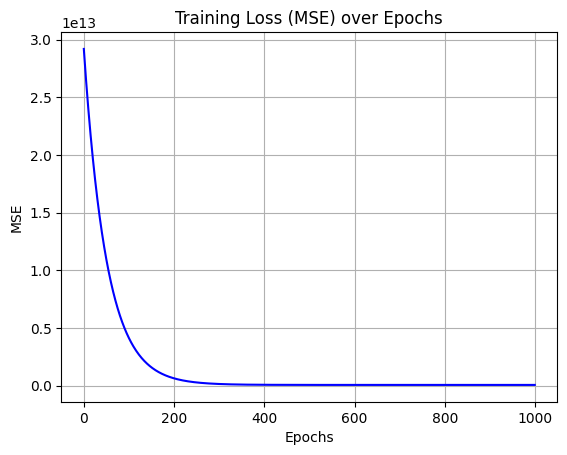


MODEL PERFORMANCE:
RMSE: 420662.6233763031
R² Score: 0.9710586676835639


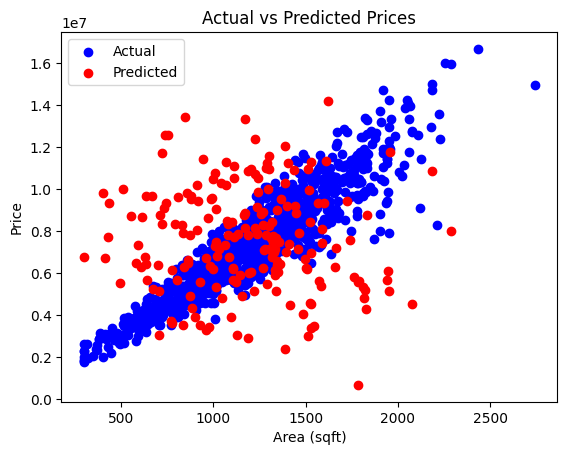

In [10]:

dataset = dataset.dropna()                   


X = dataset[['area_sqft', 'bedrooms', 'bathrooms', 'floor', 'age_years',
             'location_score', 'has_gated', 'distance_km', 'parking', 'near_metro']].values


y = dataset['price'].values.reshape(-1, 1)

# ----------------  Normalize X ----------------


X = (X - X.mean(axis=0)) / X.std(axis=0)

#-----------------  column of 1s

X = np.hstack((np.ones((X.shape[0], 1)), X))

# ----------------  (80%=training, 20%= testing) ----------------


split = int(0.8 * len(X))

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

# ---------------- introduce model ----------------


m, n = X_train.shape
theta = np.zeros((n, 1))   # all weights = 0
alpha = 0.01               # learning rate
epochs = 1000              # training iterations

# ---------------- STEP 6: Functions ----------------


def predict(X, theta):
    return X @ theta    # same as np.dot(X, theta)

def mse(X, y, theta):
    y_pred = X.dot(theta)

    errors = y_pred - y
    mse_value = (errors ** 2).sum() / (2 * len(y))

    return mse_value



# ---------------- STEP 7: Gradient Descent ----------------



losses = []

for i in range(epochs):
    errors = predict(X_train, theta) - y_train
    gradient = (1 / m) * X_train.T @ errors
    theta = theta - alpha * gradient
    losses.append(mse(X_train, y_train, theta))


# ---------------- STEP 8: Show training loss ----------------

plt.plot(losses, color='blue')
plt.title("Training Loss (MSE) over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.show()



# ----------------  Evaluate model ----------------


y_pred = predict(X_test, theta)

rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
r2 = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

print("\nMODEL PERFORMANCE:")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# ----------------  actual vs predicted ----------------



plt.scatter(dataset['area_sqft'], dataset['price'], color='blue', label="Actual")
plt.scatter(dataset['area_sqft'][:len(y_pred)], y_pred, color='red', label="Predicted")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


In [ ]:

----------        So price only seems to be dependent, so it will always at y axis against all features--------------


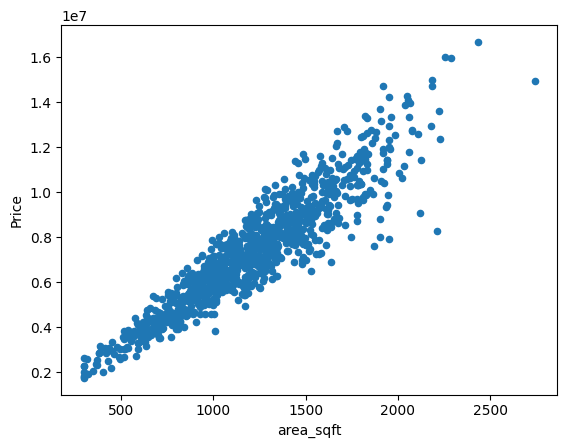

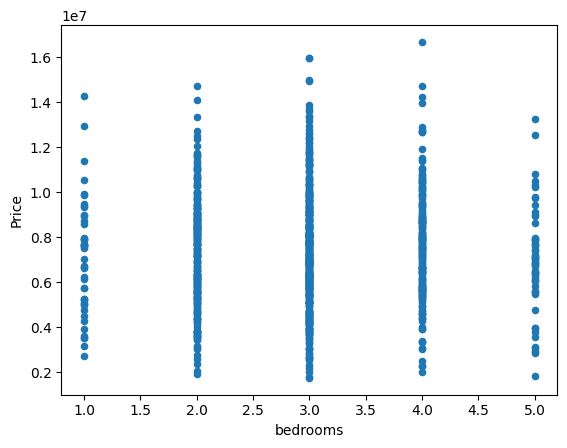

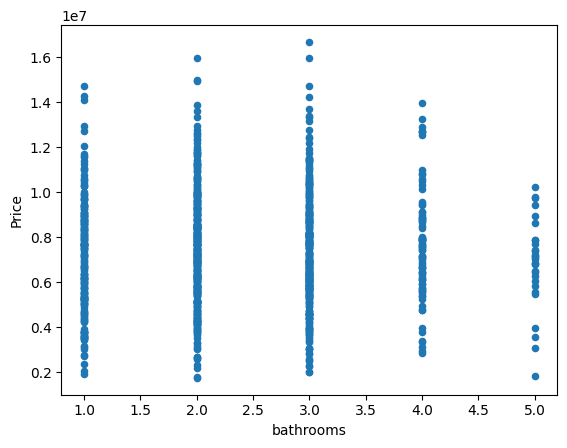

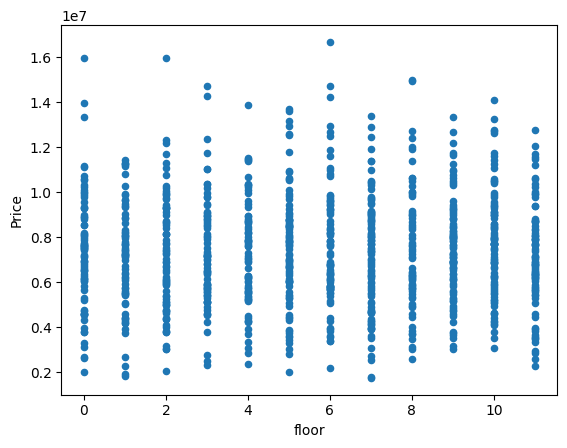

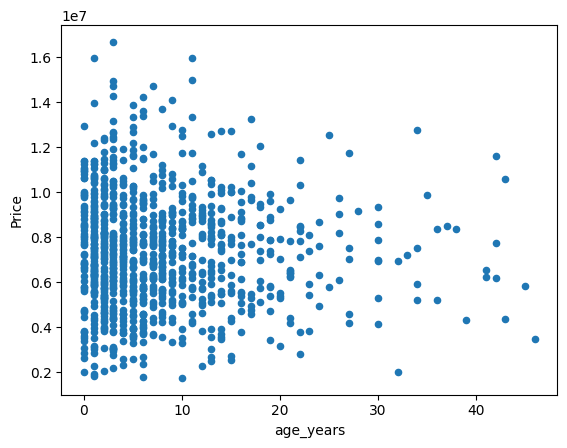

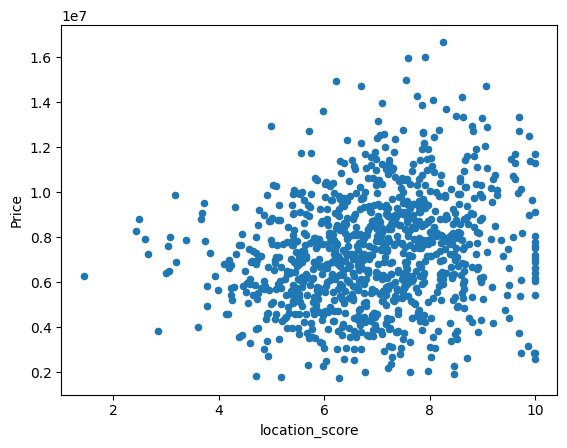

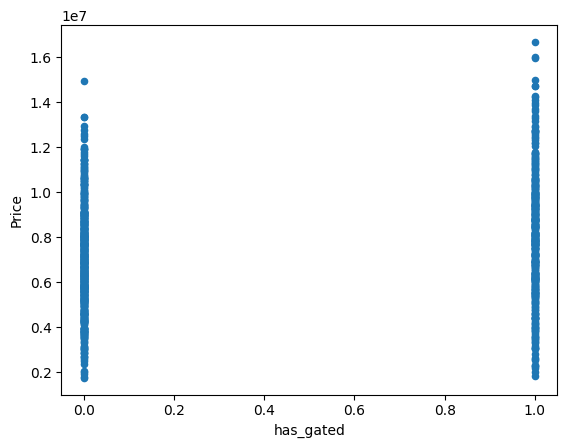

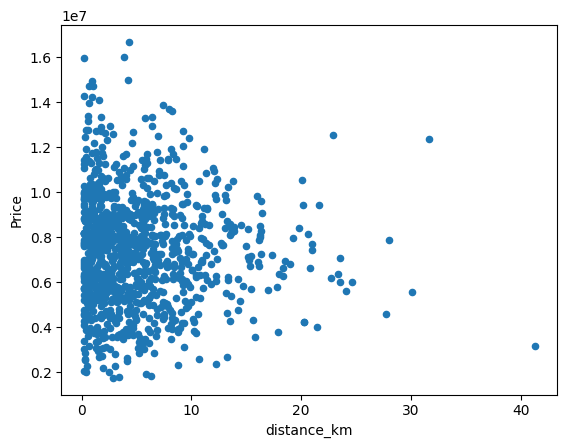

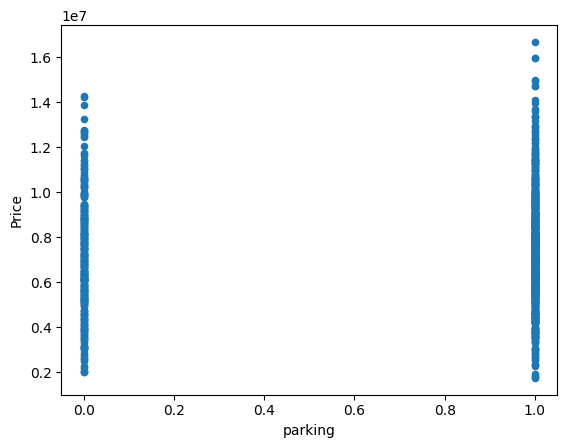

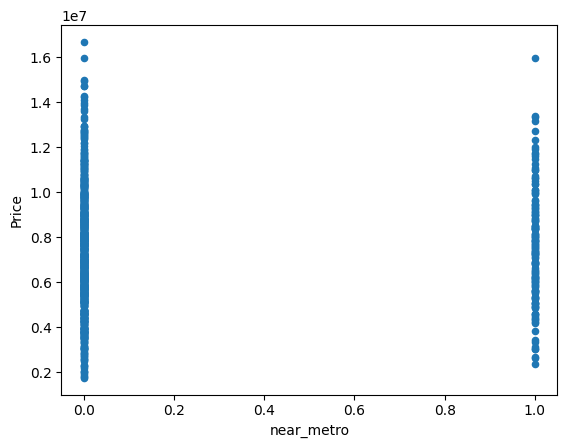

In [41]:

# List of features to compare with price


Features=['area_sqft','bedrooms','bathrooms','floor','age_years','location_score','has_gated','distance_km','parking','near_metro']

for i in Features:
    dataset.plot(kind='scatter',x=i,y='price')
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()

In [ ]:

      ------------- loss function (MSE) vs time (iterations / epochs) -------------


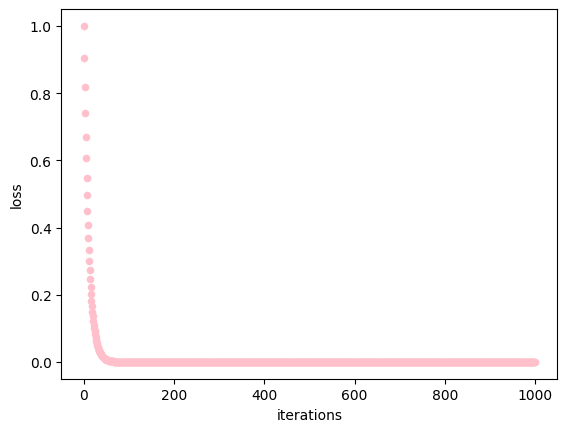

In [11]:
iterations=np.arange(len(dataset))     # 1000 traning step

loss = np.exp(-0.1*iterations)         # As (traning step) iterations increase, loss decrease : -0.1*iterations

dataset=pd.DataFrame({
    'iterations':iterations,
    'loss':loss
})

dataset.plot(kind='scatter',x='iterations',y='loss',color='pink')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()